# Whats there is this notebook
1. Simple Eda
2. FeatureSelection (using RandomForest)
3. Xgboost 
4. Lgbtree

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import boxcox

import math

import xgboost as xgb 
from xgboost.sklearn import XGBClassifier


from sklearn.model_selection import KFold
from sklearn.metrics import f1_score


In [153]:
dataset = pd.read_csv('Train.csv')

In [60]:
test_dataset = pd.read_csv('Test.csv')

# Feature Importance using Random Forest

In [151]:
from sklearn.ensemble import RandomForestClassifier

x = dataset[dataset.columns[:-1]]
y = dataset[dataset.columns[-1]]
rf = RandomForestClassifier()

rf.fit(x,y)

c:\users\clive\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

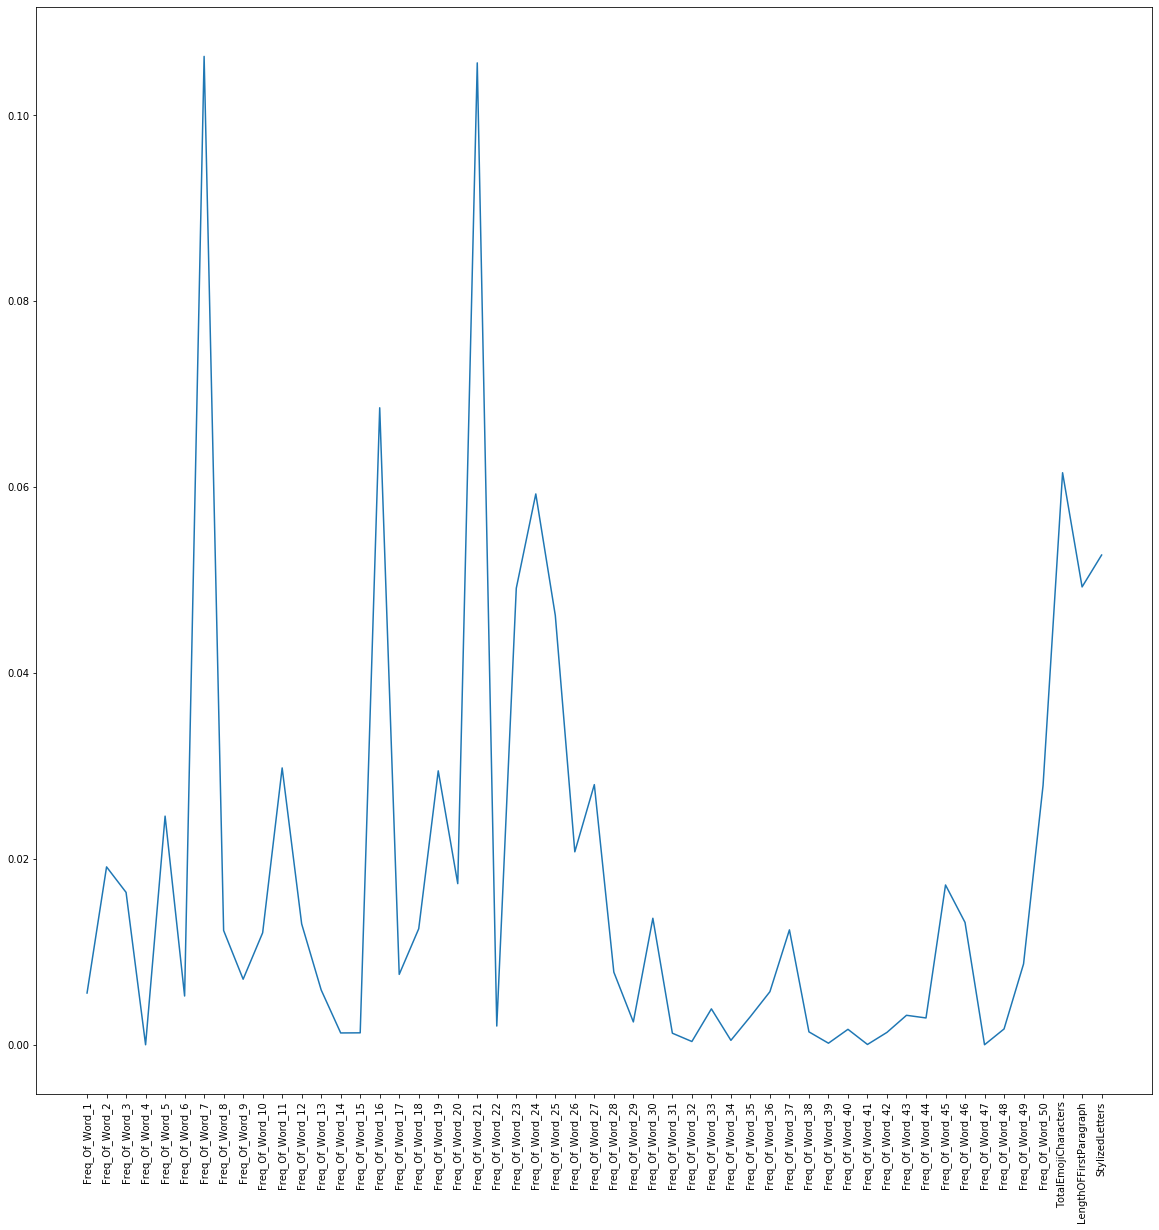

In [11]:
plt.figure(figsize=(20,20))
plt.plot(rf.feature_importances_)
plt.xticks(np.arange(x.shape[1]),dataset.columns.tolist(),rotation  = 90)
plt.show()

In [29]:
dataset.columns

Index(['Freq_Of_Word_1', 'Freq_Of_Word_2', 'Freq_Of_Word_3', 'Freq_Of_Word_4',
       'Freq_Of_Word_5', 'Freq_Of_Word_6', 'Freq_Of_Word_7', 'Freq_Of_Word_8',
       'Freq_Of_Word_9', 'Freq_Of_Word_10', 'Freq_Of_Word_11',
       'Freq_Of_Word_12', 'Freq_Of_Word_13', 'Freq_Of_Word_14',
       'Freq_Of_Word_15', 'Freq_Of_Word_16', 'Freq_Of_Word_17',
       'Freq_Of_Word_18', 'Freq_Of_Word_19', 'Freq_Of_Word_20',
       'Freq_Of_Word_21', 'Freq_Of_Word_22', 'Freq_Of_Word_23',
       'Freq_Of_Word_24', 'Freq_Of_Word_25', 'Freq_Of_Word_26',
       'Freq_Of_Word_27', 'Freq_Of_Word_28', 'Freq_Of_Word_29',
       'Freq_Of_Word_30', 'Freq_Of_Word_31', 'Freq_Of_Word_32',
       'Freq_Of_Word_33', 'Freq_Of_Word_34', 'Freq_Of_Word_35',
       'Freq_Of_Word_36', 'Freq_Of_Word_37', 'Freq_Of_Word_38',
       'Freq_Of_Word_39', 'Freq_Of_Word_40', 'Freq_Of_Word_41',
       'Freq_Of_Word_42', 'Freq_Of_Word_43', 'Freq_Of_Word_44',
       'Freq_Of_Word_45', 'Freq_Of_Word_46', 'Freq_Of_Word_47',
       'Fre

# Freq_Of_Word_7 , 16,21,23,24,(25),THE LAST 3 

In [152]:

features_to_look_at = []

# [5,7,11,16,19,21,27,23,25]

for i in [2,3,7,11,16,19,21,27,23,25,30,37,45]:
    
    features_to_look_at.append(f'Freq_Of_Word_{i}_new')

features_to_look_at.extend([ 'TotalEmojiCharacters_new', 'LengthOFFirstParagraph_new', 'StylizedLetters_new'])    
    
print(features_to_look_at)    
# for i in


for i in features_to_look_at:
    print(dataset[i].mean(),dataset[i].std())
    

['Freq_Of_Word_2_new', 'Freq_Of_Word_3_new', 'Freq_Of_Word_7_new', 'Freq_Of_Word_11_new', 'Freq_Of_Word_16_new', 'Freq_Of_Word_19_new', 'Freq_Of_Word_21_new', 'Freq_Of_Word_27_new', 'Freq_Of_Word_23_new', 'Freq_Of_Word_25_new', 'Freq_Of_Word_30_new', 'Freq_Of_Word_37_new', 'Freq_Of_Word_45_new', 'TotalEmojiCharacters_new', 'LengthOFFirstParagraph_new', 'StylizedLetters_new']


KeyError: 'Freq_Of_Word_2_new'

In [7]:
for i in features_to_look_at:
    
    print(dataset[dataset[i] > test_dataset[i].max()].index)

Int64Index([], dtype='int64')
Int64Index([571], dtype='int64')
Int64Index([92], dtype='int64')


In [27]:
# dataset = dataset.drop([444,59,723,108,571,427,92])

In [11]:
# fw7_unique =  sorted(dataset['Freq_Of_Word_7'].unique())
# den = pd.Series(np.diff(fw7_unique)).value_counts().index[0]
# d2 = (dataset['Freq_Of_Word_7']/0.02301249 - 0.221379).round()
# dataset['Freq_Of_Word_7_new'] =  d2 + d2.max()

In [17]:
# fw7_unique =  sorted(dataset['Freq_Of_Word_21'].unique())
# den = pd.Series(np.diff(fw7_unique)).value_counts().index[0]
# d3 = (dataset['Freq_Of_Word_21']/den - 0.943943).round()
# dataset['Freq_Of_Word_21_new'] = d3 + d3.max()


In [19]:
# fw7_unique =  sorted(dataset['TotalEmojiCharacters'].unique())
# den = pd.Series(np.diff(fw7_unique)).value_counts().index[0]

# d4 = (dataset['TotalEmojiCharacters']/den - .096912).round()
# dataset['TotalEmojiCharacters_new'] = d4 + d4.max()


In [61]:
def last_mapper(x):
    fw7_unique =  sorted(x.unique())
    den = pd.Series(np.diff(fw7_unique)).value_counts().index[0]

    sub = abs(math.modf(pd.Series(x/den).value_counts().index[0])[0])

    d4 = (x/den - sub).round()
    return d4 + d4.max()

new_feature_columns = []
for i in dataset.columns[:-1]:

    dataset[i+"_new"] = last_mapper(dataset[i])
    new_feature_columns.append(i+"_new")

In [85]:
# dataset[new_feature_columns].shape


In [71]:
# last_hope = ['Freq_Of_Word_7_new','Freq_Of_Word_21_new','TotalEmojiCharacters_new']

In [105]:
from sklearn.decomposition import PCA


pca = PCA()


metrix = pca.fit_transform(dataset[new_feature_columns])
pca.explained_variance_ratio_

array([5.72039769e-01, 1.20745181e-01, 9.33853862e-02, 4.02427890e-02,
       2.81657589e-02, 1.85667066e-02, 1.59989333e-02, 1.26899679e-02,
       1.02359356e-02, 8.91264727e-03, 7.68767608e-03, 7.03915352e-03,
       6.51380180e-03, 5.88975051e-03, 4.46174909e-03, 4.25032260e-03,
       3.79326595e-03, 3.46344825e-03, 3.23666594e-03, 3.00726061e-03,
       2.87334707e-03, 2.56212158e-03, 2.30121105e-03, 2.09492727e-03,
       1.83948442e-03, 1.65019514e-03, 1.57466842e-03, 1.49236949e-03,
       1.41876036e-03, 1.36157771e-03, 1.12652200e-03, 1.06344063e-03,
       9.23532866e-04, 8.58007641e-04, 7.95271071e-04, 7.45973878e-04,
       6.44684225e-04, 6.36516406e-04, 5.87559577e-04, 5.03587708e-04,
       4.74387745e-04, 3.80324948e-04, 2.96485425e-04, 2.88001866e-04,
       2.77780740e-04, 2.50004708e-04, 2.31959671e-04, 1.79548239e-04,
       1.65405196e-04, 7.39853326e-05, 1.80715608e-06, 3.80966004e-07,
       1.14678969e-09])

# class Balance

In [58]:
dataset['IsGoodNews'].value_counts()

0    579
1    368
Name: IsGoodNews, dtype: int64

In [66]:
dataset[dataset.duplicated()]

,Freq_Of_Word_1,Freq_Of_Word_2,Freq_Of_Word_3,Freq_Of_Word_4,Freq_Of_Word_5,Freq_Of_Word_6,Freq_Of_Word_7,Freq_Of_Word_8,Freq_Of_Word_9,Freq_Of_Word_10,...,Freq_Of_Word_44_new,Freq_Of_Word_45_new,Freq_Of_Word_46_new,Freq_Of_Word_47_new,Freq_Of_Word_48_new,Freq_Of_Word_49_new,Freq_Of_Word_50_new,TotalEmojiCharacters_new,LengthOFFirstParagraph_new,StylizedLetters_new
804,1.047476,-0.318036,-0.561952,-0.039223,0.779894,2.661724,-0.304257,-0.240708,-0.318797,0.248536,...,988.0,1930.0,1301.0,13.0,232.0,4279.0,4979.0,1097.0,2195.0,8730.0
842,1.047476,-0.318036,-0.561952,-0.039223,0.779894,2.661724,-0.304257,-0.240708,-0.318797,0.248536,...,988.0,1930.0,1301.0,13.0,232.0,4279.0,4979.0,1097.0,2195.0,8730.0
851,1.080019,-0.318036,-0.561952,-0.039223,0.808517,-0.353977,-0.304257,-0.240708,-0.318797,0.262524,...,988.0,1974.0,1301.0,13.0,232.0,4279.0,4979.0,1094.0,2116.0,8704.0
861,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,...,988.0,1930.0,1301.0,13.0,232.0,4279.0,4979.0,1093.0,2089.0,8553.0


In [67]:
dataset.drop(index = [804,842,851,861],inplace = True)
dataset = dataset.reindex()

# Plot Histograms for all features

In [354]:
# dataset.hist(figsize = (20,20),column = dataset.columns[:-1])
# plt.show()    
    

In [60]:
# np.log(dataset).hist(figsize = (20,20),column = dataset.columns[:-1])
# # np.log(test_dataset).hist(figsize = (20,20),column = dataset.columns[:-1])
# plt.show()



# Compare data

In [457]:
def cor_selector(X, y,num_feats):
    features_to_keep = []
    
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        
        if abs(cor) > 0.02:
            
            features_to_keep.append(i)
           
   
    return features_to_keep


feaures_to_keep = cor_selector(dataset.iloc[:,:-1], y,53)


# transformations 

# getting the data ready

In [154]:
feature_cols = dataset.columns[:-1]

x = dataset[feature_cols].values


# x_log = np.log(dataset[feature_cols].values)

y = dataset['IsGoodNews'].values

print(x.shape,y.shape)

(947, 53) (947,)


In [163]:
no_class_1 = len(dataset[dataset['IsGoodNews'] == 1])
print(no_class_1)
class0 = dataset[dataset['IsGoodNews'] == 0][0:no_class_1]
print(len(class0))
class1 = dataset[dataset['IsGoodNews'] == 1]

data = np.concatenate([class0,class1])

print(data.shape)

x= data[:,:-1]
print(x_n.shape)
y= data[:,-1]
print(y_n.shape)

368
368
(736, 54)
(728, 106)
(728,)


In [164]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression()
lr.fit(x,y)
ypre = lr.predict(x)
f1_score(ypre,y)

c:\users\clive\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9325997248968364

In [174]:
# for trt,tst in folds.split(x_log):
    
#     trainx,testx = x_log[trt],x_log[tst]
#     trainy,testy = y[trt],y[tst]
    
#     print(trainx.shape,trainy.shape)
    
    
#     plt.figure()
    
#     ax = plt.subplot('221')
#     ax.plot(trainx)
#     ax = plt.subplot('222')
#     ax.hist(trainy)

#     ax = plt.subplot('223')
#     ax.plot(testx)
#     ax = plt.subplot('224')
#     ax.hist(testy)


In [64]:

# def get_balanced_dataset(dataset):
#         no_class_1 = len(dataset[dataset['IsGoodNews'] == 1])
#         print('no 1 class',no_class_1)
#         class0 = dataset[dataset['IsGoodNews'] == 0][0:no_class_1]
#         print('no of 0 class',len(class0))
#         class1 = dataset[dataset['IsGoodNews'] == 1]

#         data = np.concatenate([class0,class1])

      

#         x_n = data[:,:-1]
# #         print(x_n.shape)
#         y_n = data[:,-1]
# #         print(y_n.shape)
        
#         return np.log(x_n),y_n

# trying to train the clf on balanced classes

In [163]:
clf

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [166]:
clf = XGBClassifier()



avg = 0
folds = KFold(n_splits= 5,shuffle = True)
for trt,tst in folds.split(x):


    trainx,testx = x[trt],x[tst]
    trainy,testy = y[trt],y[tst]
    
    
    
    print(trainx.shape,trainy.shape)

    clf.fit(trainx,trainy)

    pred = clf.predict(testx)
    
    print(f1_score(testy,pred))

    
    avg += f1_score(testy,pred)
    
print(avg/5)    

(588, 53) (588,)
0.9271523178807947
(589, 53) (589,)
0.9185185185185184
(589, 53) (589,)
0.912280701754386
(589, 53) (589,)
0.9271523178807947
(589, 53) (589,)
0.8970588235294118
0.9164325359127812


In [126]:
clf.feature_importances_

array([0.0269822 , 0.01215723, 0.3112565 , 0.00845325, 0.04607922,
       0.01274774, 0.0926122 , 0.1480168 , 0.07852581, 0.13601188,
       0.        , 0.02323674, 0.0200096 , 0.03613653, 0.01955706,
       0.02821717], dtype=float32)

In [167]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import make_scorer



params = {
    
           'max_depth': list(range(0,40,2)),
            'min_child_weight':list(range(0,20,2)),
            'num_leaves':[0,1,2,3,10,2**4 -1,20,25],
            'subsample':[i/10 for i in range(0,10)],
            'colsample_bytree':[i/10 for i in range(0,10)],
             'n_estimators':[100,200,300,700,800,1000],
             'learning_rate':[i/10 for i in range(1,10)]
          }

gs = RandomizedSearchCV(estimator=clf,param_distributions=params,n_iter = 200,cv = 5,scoring ='f1',n_jobs = -1,verbose = 1)

gs.fit(x,y)




Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.7min finished
c:\users\clive\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster=None,
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints=None,
                                           n_...
                                                          0.9],
                                        'max_depth': [0, 2, 4, 6, 8, 10, 12, 14,
                                   

In [168]:
gs.best_params_,gs.best_score_

({'subsample': 0.9,
  'num_leaves': 25,
  'n_estimators': 800,
  'min_child_weight': 0,
  'max_depth': 20,
  'learning_rate': 0.6,
  'colsample_bytree': 0.2},
 0.933001468015992)

In [170]:
clf_tuned = XGBClassifier(**gs.best_params_
                    )

avg = 0
folds = KFold(n_splits = 5,shuffle= True)
for trt,tst in folds.split(x):
    
    trainx,testx = x[trt],x[tst]
    trainy,testy = y[trt],y[tst]
    
    print(trainx.shape,trainy.shape)

    clf_tuned.fit(trainx,trainy)

    pred = clf_tuned.predict(testx)
    
    print(f1_score(testy,pred))

    
    avg += f1_score(testy,pred)
    
print(avg/5)    


(588, 53) (588,)
0.9375000000000001
(589, 53) (589,)
0.923076923076923
(589, 53) (589,)
0.9370629370629372
(589, 53) (589,)
0.9447852760736196
(589, 53) (589,)
0.9014084507042254
0.9287667173835411


In [132]:
from sklearn.svm import SVC

svc = SVC(C = 100)

svc.fit(x,y)

f1_score(svc.predict(x),y)


c:\users\clive\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9972451790633609

In [133]:
from sklearn.svm import SVC

svc = SVC(C = 100)


avg = 0
folds = KFold(n_splits = 5)
for trt,tst in folds.split(x):
    
    trainx,testx = x[trt],x[tst]
    trainy,testy = y[trt],y[tst]
    
    print(trainx.shape,trainy.shape)

    svc.fit(trainx,trainy)

    pred = svc.predict(testx)
    
    print(f1_score(testy,pred))

    
    avg += f1_score(testy,pred)
    
print(avg/5)    

(754, 16) (754,)
0.16470588235294117
(754, 16) (754,)


c:\users\clive\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\clive\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.15789473684210523
(754, 16) (754,)
0.10126582278481013
(755, 16) (755,)


c:\users\clive\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\clive\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.2666666666666667
(755, 16) (755,)
0.21333333333333335
0.18077328839597132


c:\users\clive\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# VoteClassifier

In [223]:
vc

VotingClassifier(estimators=[('xgboost',
                              XGBClassifier(base_score=0.5, booster=None,
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=10,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=300, n_jobs=0,
                                            n...
                                                     class_weight=None,
                                          

In [178]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(30)


avg = 0
folds = KFold(n_splits = 5,shuffle = True)
for trt,tst in folds.split(x):
    
    trainx,testx = x[trt],x[tst]
    trainy,testy = y[trt],y[tst]
    
    print(trainx.shape,trainy.shape)

    rfc.fit(trainx,trainy)

    pred = rfc.predict(testx)
    
    print(f1_score(testy,pred))

    
    avg += f1_score(testy,pred)
    
print(avg/5)    


(588, 53) (588,)
0.9403973509933775
(589, 53) (589,)
0.8789808917197451
(589, 53) (589,)
0.9230769230769231
(589, 53) (589,)
0.948905109489051
(589, 53) (589,)
0.9261744966442953
0.9235069543846783


In [179]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(300)

# svc = SVC(probability = True)
vc = VotingClassifier(estimators=[('xgboost',gs.best_estimator_),('rfc',rfc),('lr',lr)],
                 voting='soft')


avg = 0
folds = KFold(n_splits = 5,shuffle = True)
for trt,tst in folds.split(x):
    
    trainx,testx = x[trt],x[tst]
    trainy,testy = y[trt],y[tst]
    
    print(trainx.shape,trainy.shape)

    vc.fit(trainx,trainy)

    pred = vc.predict(testx)
    
    print(f1_score(testy,pred))

    
    avg += f1_score(testy,pred)
    
print(avg/5)    



(588, 53) (588,)


c:\users\clive\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9378531073446328
(589, 53) (589,)


c:\users\clive\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8955223880597014
(589, 53) (589,)


c:\users\clive\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9142857142857144
(589, 53) (589,)


c:\users\clive\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9333333333333335
(589, 53) (589,)
0.9583333333333334
0.927865575271343


c:\users\clive\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# testing 

In [158]:
test = pd.read_csv('Test.csv')

# new_feature_columns = []
# for i in test.columns:

#     test[i+"_new"] = last_mapper(test[i])
#     new_feature_columns.append(i+"_new")

In [145]:
test[features_to_look_at]

,Freq_Of_Word_2_new,Freq_Of_Word_3_new,Freq_Of_Word_7_new,Freq_Of_Word_11_new,Freq_Of_Word_16_new,Freq_Of_Word_19_new,Freq_Of_Word_21_new,Freq_Of_Word_27_new,Freq_Of_Word_23_new,Freq_Of_Word_25_new,Freq_Of_Word_30_new,Freq_Of_Word_37_new,Freq_Of_Word_45_new,TotalEmojiCharacters_new,LengthOFFirstParagraph_new,StylizedLetters_new
0,394.0,340.0,514.0,70.0,704.0,875.0,1099.0,1629.0,335.0,490.0,217.0,475.0,1358.0,1016.0,1981.0,2763.0
1,394.0,340.0,514.0,70.0,573.0,941.0,738.0,1629.0,335.0,680.0,217.0,607.0,1358.0,1014.0,1945.0,3000.0
2,394.0,351.0,514.0,70.0,573.0,920.0,727.0,1635.0,335.0,504.0,217.0,497.0,1358.0,1014.0,1967.0,3194.0
3,394.0,340.0,618.0,70.0,573.0,1241.0,914.0,1629.0,335.0,490.0,217.0,475.0,1358.0,1014.0,1985.0,2819.0
4,424.0,340.0,514.0,70.0,573.0,875.0,705.0,1629.0,335.0,505.0,217.0,475.0,1358.0,1012.0,1934.0,2741.0
5,394.0,340.0,514.0,70.0,573.0,1541.0,705.0,1629.0,335.0,490.0,217.0,475.0,1358.0,1013.0,1938.0,2684.0
6,394.0,340.0,514.0,70.0,573.0,1309.0,705.0,1629.0,335.0,490.0,217.0,475.0,1358.0,1020.0,1989.0,2732.0
7,520.0,340.0,514.0,70.0,699.0,1001.0,705.0,1629.0,335.0,490.0,217.0,475.0,1358.0,1020.0,1968.0,2796.0
8,417.0,351.0,514.0,75.0,573.0,1224.0,833.0,1629.0,381.0,490.0,217.0,475.0,1392.0,1015.0,2070.0,3314.0
9,394.0,340.0,514.0,70.0,573.0,875.0,705.0,1629.0,335.0,534.0,217.0,475.0,1358.0,1013.0,1940.0,2708.0


In [173]:

xtest = test.values

print(xtest.shape)



score = gs.best_estimator_.predict(xtest)


(527, 53)


In [160]:
subs = pd.read_excel('Sample_Submission.xlsx')
print(subs.head(5))

# subs.to_excel('xgboost_1.xlsx')

   IsGoodNews
0           1
1           1
2           1
3           1
4           1


In [180]:
submits = pd.DataFrame(data = {'IsGoodNews':score.astype('int32')})

print(submits.head())

submits.to_excel("vc.xlsx")



   IsGoodNews
0           0
1           0
2           0
3           1
4           0


In [181]:
submits['IsGoodNews'].value_counts()

0    319
1    208
Name: IsGoodNews, dtype: int64